In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gastimator import gastimator
import pandas as pd
from gastimator import priors
from gastimator import corner_plot
import math

In [33]:
SED=pd.read_csv('Documents/NuclearSED.csv')
mcmcdet=pd.read_csv('Documents/MCMCfit.csv')
SEDdust=pd.read_csv('Documents/DustSED.csv')
mcmcdust=pd.read_csv('Documents/MCMCdust.csv')

In [3]:
def freefree(values,v,Te,dist):
    sfr=10**(values)
    d=dist*3.086e22
    erg=sfr/(4.6e-28*(Te/1e4)**(-0.45)*(v/1e9)**0.1)
    Lum=erg/1e7
    sj=Lum/(4*math.pi*d**2)
    s=sj/1e-26
    return s

In [4]:
def power_law(values,x):
    B=(values[1]*(x/1e10)**values[0])
    return B

In [5]:
def mod_black_body(values,v,D,T,b):
    d=D*3.0856e22
    mlog=10**(values)
    m=mlog*2e30
    c=3e8
    h=6.626e-34
    kb=1.38e-23
    v0=6e11
    B=((2*h*v**3/c**2)*1/(np.exp(h*v/(kb*T))))
    k0=0.051
    k=k0*((v/v0)**b)
    S=(k*B*m/(d**2))
    sj=S/1e-26
    return sj

In [6]:
def dust_black_body(values,v,D):
    d=D*3.0856e22
    mlog=10**(values[0])
    m=mlog*2e30
    c=3e8
    h=6.626e-34
    kb=1.38e-23
    v0=6e11
    T=values[1]
    b=values[2]
    B=((2*h*v**3/c**2)*1/(np.exp(h*v/(kb*T))))
    k0=0.051
    k=k0*((v/v0)**b)
    S=(k*B*m/(d**2))
    sj=S/1e-26
    return sj

In [7]:
def combined(values,x,D,T,b):
    com=power_law(values[0:2],x)+mod_black_body(values[2],x,D,T,b)
    return com

In [8]:
def freefreecom(values,v,D,Te):
    comff=power_law(values[0:2],v)+dust_black_body(values[2:5],v,D)+freefree(values[5],v,Te,D)
    return comff

In [46]:
#SEDfdata=SED['NGC 3607 Flux Density (Jy)']
#SEDxdata=SED['NGC 3607 Frequency (Hz)']
#radiox=SEDxdata[0:3]
#radioy=SEDfdata[0:3]
#almamm=[0.0027,0.0026]
#almafreq=[2.32e11,2.47e11]
#dustx=SEDxdata[3:11]
#dusty=SEDfdata[3:11]

In [47]:
#x=np.array(radiox)
#x=np.append(radiox,almafreq)
#print(x)

In [48]:
#mcmc=gastimator(power_law,x)

In [49]:
#data=np.array(radioy)
#data=np.append(radioy,almamm)

In [50]:
#mcmc.labels=np.array(['Index','Intercept'])
#mcmc.guesses=np.array([-0.7,9e-3])
#mcmc.min=np.array([-2,1e-3])
#mcmc.max=np.array([0,1e-2])
#mcmc.fixed=np.array([False,False])

In [51]:
#indexprior=priors.gaussian(-0.48,1.)
#interceptprior=priors.gaussian(130,1.)
#mcmc.prior_func=(indexprior.eval,interceptprior.eval)

In [52]:
#mcmc.precision=np.array([1.,1.])

In [53]:
#nsample=100000
#outputvalue,outputl1=mcmc.run(data,1e-3,nsample,nchains=1,plot=False)

In [54]:
#outputl1

In [55]:
#figure = corner_plot.corner_plot(outputvalue.T,like=outputl1,labels=mcmc.labels,quantiles=[0.16, 0.5, 0.84])

In [56]:
#x1=np.array(almafreq)
#data1=np.array(almamm)

In [57]:
#mcmc1=gastimator(mod_black_body,x1,27,23.3,2)

In [58]:
#mcmc1.labels=np.array(['Mass'])
#mcmc1.guesses=np.array([1e6])
#mcmc1.min=np.array([0.])
#mcmc1.max=np.array([2e6])
#mcmc1.fixed=np.array([False])
#mcmc1.precision=np.array([1e5])

In [59]:
#massprior=priors.gaussian(1e6,1.0)
#tempprior=priors.gaussian(27,1.0)
#distanceprior=priors.gaussian(23.3,1.0)
#betaprior=priors.gaussian(2,1.0)
#mcmc1.prior_func=massprior.eval(x1)

In [60]:
#nsample1=100000
#outputvalue1,outputl2=mcmc1.run(data1,1e-2,nsample1,nchains=1,plot=False)

In [61]:
# i=33
# SEDfreq=mcmcdet['SED Freq']
# SEDflux=mcmcdet['SED Flux']
# SEDRMS=mcmcdet['SED RMS']
# xfreq=SED[SEDfreq[i]]
# datafl=SED[SEDflux[i]]
# rms=SED[SEDRMS[i]]
# #xfreq=[]
# #datafl=[]
# #rms=[]
# usb=mcmcdet['USB Flux']
# lsb=mcmcdet['LSB Flux']
# usbfreq=mcmcdet['USB Freq']
# lsbfreq=mcmcdet['LSB Freq']
# usbrms=mcmcdet['USB RMS']
# lsbrms=mcmcdet['LSB RMS']
# alma=np.array([lsb[i],usb[i]])
# almafreq=np.array([lsbfreq[i],usbfreq[i]])
# almarms=np.array([lsbrms[i],usbrms[i]])
# xfreq=np.append(xfreq,almafreq)
# datafl=np.append(datafl,alma)
# rms=np.append(rms,almarms)
# temp=mcmcdet['Temperature']
# beta=mcmcdet['Beta']
# distance=mcmcdet['Distance']
# indexmax=mcmcdet['Index Max']
# indexmin=mcmcdet['Index Min']
# indexguess=mcmcdet['Index Guess']
# interceptmax=mcmcdet['Intercept Max']
# interceptmin=mcmcdet['Intercept Min']
# interceptguess=mcmcdet['Intercept Guess']
# massmax=mcmcdet['Mass Max']
# massmin=mcmcdet['Mass Min']
# massguess=mcmcdet['Mass Guess']
# mmax=np.log10(massmax)
# mguess=np.log10(massguess)

In [62]:
#mcmccom=gastimator(combined,xfreq,distance[i],temp[i],beta[i])
#mcmccom=gastimator(power_law,xfreq)
# #mcmccom=gastimator(mod_black_body,xfreq,distance[i],temp[i],beta[i])

In [63]:
# mcmccom.labels=np.array(['Index','Intercept','Mass'])
# mcmccom.guesses=np.array([indexguess[i],interceptguess[i],mguess[i]])
# mcmccom.min=np.array([indexmin[i],interceptmin[i],massmin[i]])
# mcmccom.max=np.array([indexmax[i],interceptmax[i],mmax[i]])
# mcmccom.fixed=np.array([False,False,False])
# mcmccom.precision=np.array([1.,1.,1e2])

In [64]:
# mcmccom.labels=np.array(['Index','Intercept'])
# mcmccom.guesses=np.array([indexguess[i],interceptguess[i]])
# mcmccom.min=np.array([indexmin[i],interceptmin[i]])
# mcmccom.max=np.array([indexmax[i],interceptmax[i]])
# mcmccom.fixed=np.array([False,False])
# mcmccom.precision=np.array([0.1,0.1])

In [65]:
# mcmccom.labels=np.array(['Mass'])
# mcmccom.guesses=np.array([massguess[i]])
# mcmccom.min=np.array([massmin[i]])
# mcmccom.max=np.array([massmax[i]])
# mcmccom.fixed=np.array([False])
# mcmccom.precision=np.array([1e2])

In [66]:
# nsamplescom=10000
# outputvaluecom,outputllcom=mcmccom.run(datafl,rms,nsamplescom,nchains=1,plot=False)

In [67]:
#np.savetxt('7172.csv',outputvaluecom,delimiter=',')

In [68]:
#figurecom = corner_plot.corner_plot(outputvaluecom.T,like=outputllcom,labels=mcmccom.labels,quantiles=[0.16, 0.5, 0.84])

In [34]:
i=33
SEDdfreq=mcmcdust['SED Freq']
SEDdflux=mcmcdust['SED Flux']
SEDdrms=mcmcdust['SED RMS']
dustfreq=SEDdust[SEDdfreq[i]]
dustflux=SEDdust[SEDdflux[i]]
dustrms=SEDdust[SEDdrms[i]]
rmstot=np.sqrt(((dustrms/dustflux)*100)**2+10**2)
distsdust=mcmcdust['Distance']
dmassmax=mcmcdust['Mass Max']
dmassmin=mcmcdust['Mass Min']
dmassguess=mcmcdust['Mass Guess']
dtempmax=mcmcdust['Temp Max']
dtempmin=mcmcdust['Temp Min']
dtempguess=mcmcdust['Temp Guess']
dbetamax=mcmcdust['Beta Max']
dbetamin=mcmcdust['Beta Min']
dbetaguess=mcmcdust['Beta Guess']

In [35]:
mcmcdfit=gastimator(dust_black_body,dustfreq,distsdust[i])

In [36]:
mcmcdfit.labels=np.array(['Mass','Temp','Beta'])
mcmcdfit.guesses=np.array([dmassguess[i],dtempguess[i],dbetaguess[i]])
mcmcdfit.max=np.array([dmassmax[i],dtempmax[i],dbetamax[i]])
mcmcdfit.min=np.array([dmassmin[i],dtempmin[i],dbetamin[i]])
mcmcdfit.fixed=np.array([False,False,False])
mcmcdfit.precision=np.array([1,0.1,0.1])

In [37]:
dustsamples=10000
outputvaluedust,outputlldust=mcmcdfit.run(dustflux,rmstot,dustsamples,nchains=1,plot=False)

Doing chain 1
     Chain has not converged - Accept rate: 0.6533333333333333
     Chain has not converged - Accept rate: 0.5933333333333334
     Still varying: ['Temp']
     Chain has not converged - Accept rate: 0.6466666666666666
     Still varying: ['Temp']
     Chain has not converged - Accept rate: 0.6266666666666667
     Still varying: ['Temp']
Chain converged: LL: -0.27347940489316686 - Accept rate:0.6533333333333333
Best chain so far!
Best fit:
  Mass: 7.906581416362676
  Temp: 25.583682155573797
  Beta: 1.6545177480940894
Starting final chain
Final best fit values and 1sigma errors:
  Mass: 7.725952922718042 + 0.17622889432727007 - 0.15006234853161615
  Temp: 26.173494974314192 ± 2.629616572419984
  Beta: 1.7321718227071152 ± 0.16568970927392201


In [73]:
#figurecom = corner_plot.corner_plot(outputvaluedust.T,like=outputlldust,labels=mcmcdfit.labels,quantiles=[0.16, 0.5, 0.84])

In [101]:
fffit=pd.read_csv('Documents/freefreefit.csv')

In [102]:
i=23
SEDdfreq=fffit['SED Freq']
SEDdflux=fffit['SED Flux']
SEDdrms=fffit['SED RMS']
freq=SED[SEDdfreq[i]]
flux=SED[SEDdflux[i]]
rms=SED[SEDdrms[i]]
dist=fffit['Distance']
massmax=fffit['Mass Max']
massmin=fffit['Mass Min']
massguess=fffit['Mass Guess']
tempmax=fffit['Temp Max']
tempmin=fffit['Temp Min']
tempguess=fffit['Temp Guess']
betamax=fffit['Beta Max']
betamin=fffit['Beta Min']
betaguess=fffit['Beta Guess']
indexmax=fffit['Index Max']
indexmin=fffit['Index Min']
indexguess=fffit['Index Guess']
interceptmax=fffit['Intercept Max']
interceptmin=fffit['Intercept Min']
interceptguess=fffit['Intercept Guess']
sfrmax=fffit['SFR Max']
sfrmin=fffit['SFR Min']
sfrguess=fffit['SFR Guess']

In [103]:
mcmcfffit=gastimator(freefreecom,freq,dist[i],1e4)

In [104]:
mcmcfffit.labels=np.array(['Index','Intercept','Mass','Temp','Beta','SFR'])
mcmcfffit.guesses=np.array([indexguess[i],interceptguess[i],massguess[i],tempguess[i],betaguess[i],sfrguess[i]])
mcmcfffit.max=np.array([indexmax[i],interceptmax[i],massmax[i],tempmax[i],betamax[i],sfrmax[i]])
mcmcfffit.min=np.array([indexmin[i],interceptmin[i],massmin[i],tempmin[i],betamin[i],sfrmin[i]])
mcmcfffit.fixed=np.array([False,False,False,False,False,False])
mcmcfffit.precision=np.array([0.1,0.1,0.001,1.,1.,1.])

In [105]:
nsamples=100000
outputvalue,outputll=mcmcfffit.run(flux,rms,nsamples,nchains=1,plot=False)

Doing chain 1
     Chain has not converged - Accept rate: 0.55
     Chain has not converged - Accept rate: 0.63
     Still varying: ['Index' 'Mass' 'Temp']
     Chain has not converged - Accept rate: 0.71
     Still varying: ['Mass']
     Chain has not converged - Accept rate: 0.7466666666666667
     Still varying: ['Mass']
     Chain has not converged - Accept rate: 0.7533333333333333
     Still varying: ['Mass' 'Temp']
     Chain has not converged - Accept rate: 0.76
     Still varying: ['Mass']
     Chain has not converged - Accept rate: 0.7466666666666667
     Still varying: ['Mass']
     Chain has not converged - Accept rate: 0.7466666666666667
     Still varying: ['Index' 'Mass']
     Chain has not converged - Accept rate: 0.78
     Still varying: ['Mass']
     Chain has not converged - Accept rate: 0.7666666666666667
     Still varying: ['Mass']
     Chain has not converged - Accept rate: 0.74
     Still varying: ['Index' 'Mass' 'Temp']
     Chain has not converged - Accept rate

     Chain has not converged - Accept rate: 0.7566666666666667
     Still varying: ['Index' 'Mass']
     Chain has not converged - Accept rate: 0.7266666666666667
     Still varying: ['Index' 'Mass' 'Temp']
     Chain has not converged - Accept rate: 0.7733333333333333
     Still varying: ['Mass' 'Temp']
     Chain has not converged - Accept rate: 0.7833333333333333
     Still varying: ['Mass' 'Temp']
     Chain has not converged - Accept rate: 0.7333333333333333
     Still varying: ['Mass' 'Temp']
     Chain has not converged - Accept rate: 0.7566666666666667
     Still varying: ['Mass']
     Chain has not converged - Accept rate: 0.79
     Still varying: ['Index' 'Mass' 'Temp']
     Chain has not converged - Accept rate: 0.76
     Still varying: ['Mass' 'Temp']
     Chain has not converged - Accept rate: 0.7733333333333333
     Still varying: ['Mass']
     Chain has not converged - Accept rate: 0.7366666666666667
     Still varying: ['Mass' 'Temp']
     Chain has not converged - Acce

Quantiles:
[(0.16, -0.5142920618355813), (0.5, -0.3754074663006879), (0.84, -0.28817755204706097)]
Quantiles:
[(0.16, 0.0024467679159055336), (0.5, 0.004322590413540601), (0.84, 0.005841697994815662)]
Quantiles:
[(0.16, 1.6502880685840982), (0.5, 5.059167292188114), (0.84, 8.467284807691529)]
Quantiles:
[(0.16, 16.139211914653657), (0.5, 29.363040587263164), (0.84, 43.45280768147372)]
Quantiles:
[(0.16, 1.5793367156591733), (0.5, 1.7487663022588684), (0.84, 1.9169369847499431)]
Quantiles:
[(0.16, 0.1703226512219092), (0.5, 0.39186936097102787), (0.84, 0.5827336663683726)]


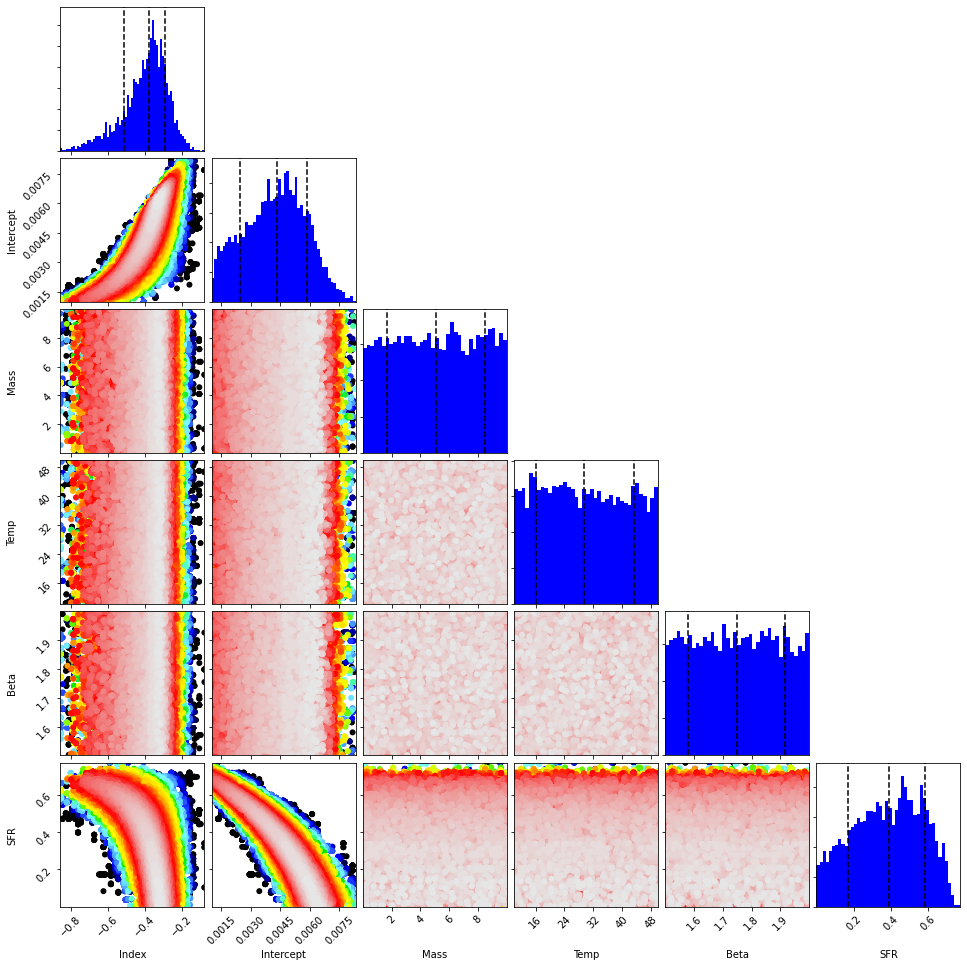

In [29]:
figurecom = corner_plot.corner_plot(outputvalue.T,like=outputll,labels=mcmcfffit.labels,quantiles=[0.16, 0.5, 0.84])